In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


In [6]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
total_records = len(df)    #Exploring Data
null_count = df.isnull().sum()

print("Total Records:", total_records)
print("\nNull Count for each column:")
print(null_count)

Total Records: 5110

Null Count for each column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [9]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
statistics_df = df[numerical_columns].describe()

print("\nMean, Median, and Standard Deviation for each numerical column:")
print(statistics_df)


Mean, Median, and Standard Deviation for each numerical column:
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.

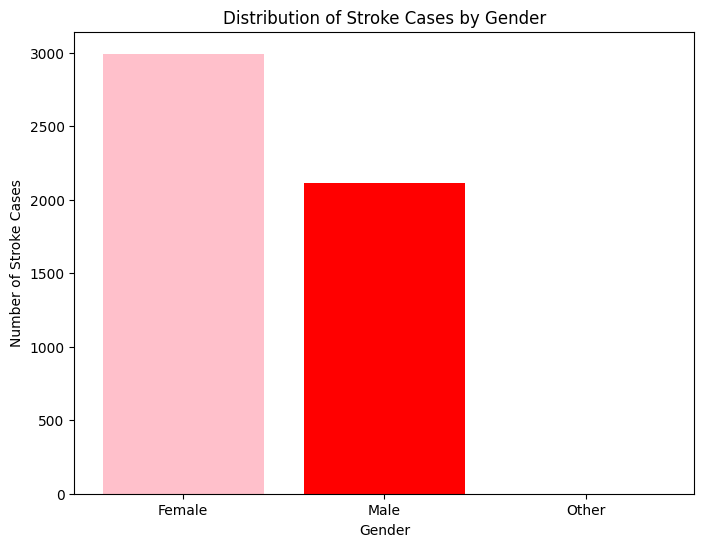

In [10]:
gender_counts = df['gender'].value_counts()

# Distribution of strokes cases based on gender ,1st Chart
plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values, color=['pink', 'red', 'lightgreen'])
plt.xlabel('Gender')
plt.ylabel('Number of Stroke Cases')
plt.title('Distribution of Stroke Cases by Gender')
plt.show()

In [11]:
# This bar chart shows the distribution of stroke cases based on gender. 
# The x-axis represents the gender categories (Female, Male, and Other), 
# and the y-axis represents the number of stroke cases for each category. 
# The bars are colored differently to represent each gender category. 
# By analyzing this chart, we can visually compare the number of stroke cases among different genders.

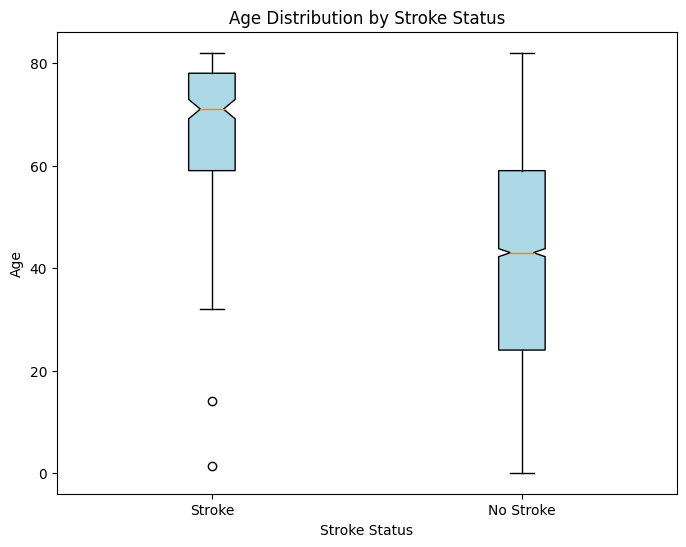

In [12]:
plt.figure(figsize=(8, 6)) # chart 2
plt.boxplot([df[df['stroke'] == 1]['age'], df[df['stroke'] == 0]['age']], labels=['Stroke', 'No Stroke'], notch=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Stroke Status')
plt.ylabel('Age')
plt.title('Age Distribution by Stroke Status')
plt.show()

In [13]:
# This box plot shows the distribution of ages for individuals with and without stroke. 
# The box on the left represents the age distribution of individuals with stroke (stroke=1), 
# while the box on the right represents the age distribution of individuals without stroke (stroke=0). 
# The notches in the boxes give an idea about the uncertainty of the median estimate, 
# and the boxes are filled with a light blue color for better visibility. 
# By examining this box plot, we can compare the age distributions of individuals
# with and without stroke and identify any potential age-related patterns in stroke occurrence.

In [14]:
is_bmi_null = df['bmi'].isnull()
percentage_null_bmi = (is_bmi_null.sum() / len(df)) * 100
print("Does 'BMI' column have null values? ", is_bmi_null.any())
print("Percentage of null values in 'BMI' column: {:.2f}%".format(percentage_null_bmi))
mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)

Does 'BMI' column have null values?  True
Percentage of null values in 'BMI' column: 3.93%


In [15]:
numerical_columns = ['age', 'avg_glucose_level']
data_for_outlier_detection = df[numerical_columns]
outlier_model = IsolationForest(contamination=0.05, random_state=42)
outlier_model.fit(data_for_outlier_detection)
outlier_predictions = outlier_model.predict(data_for_outlier_detection)
outlier_mask = outlier_predictions == 1
df_cleaned = df[outlier_mask]
print(df_cleaned)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
6     53882    Male  74.0             1              1          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             228.69  36.600000   
1     Self-

In [16]:
numerical_columns = df.select_dtypes(include=[np.number]).columns

for column in numerical_columns: # Applied Min-Max Scaling
    min_val = df[column].min()
    max_val = df[column].max()
    df[column] = (df[column] - min_val) / (max_val - min_val)

print(df)

            id  gender       age  hypertension  heart_disease ever_married  \
0     0.123214    Male  0.816895           0.0            1.0          Yes   
1     0.708205  Female  0.743652           0.0            0.0          Yes   
2     0.426015    Male  0.975586           0.0            1.0          Yes   
3     0.824928  Female  0.597168           0.0            0.0          Yes   
4     0.021929  Female  0.963379           1.0            0.0          Yes   
...        ...     ...       ...           ...            ...          ...   
5105  0.249297  Female  0.975586           1.0            0.0          Yes   
5106  0.614850  Female  0.987793           0.0            0.0          Yes   
5107  0.269730  Female  0.426270           0.0            0.0          Yes   
5108  0.514278    Male  0.621582           0.0            0.0          Yes   
5109  0.612188  Female  0.536133           0.0            0.0          Yes   

          work_type Residence_type  avg_glucose_level       bmi

In [17]:
df_encoded = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)
print(df_encoded)

            id       age  hypertension  heart_disease  avg_glucose_level  \
0     0.123214  0.816895           0.0            1.0           0.801265   
1     0.708205  0.743652           0.0            0.0           0.679023   
2     0.426015  0.975586           0.0            1.0           0.234512   
3     0.824928  0.597168           0.0            0.0           0.536008   
4     0.021929  0.963379           1.0            0.0           0.549349   
...        ...       ...           ...            ...                ...   
5105  0.249297  0.975586           1.0            0.0           0.132167   
5106  0.614850  0.987793           0.0            0.0           0.323516   
5107  0.269730  0.426270           0.0            0.0           0.128658   
5108  0.514278  0.621582           0.0            0.0           0.513203   
5109  0.612188  0.536133           0.0            0.0           0.139230   

           bmi  stroke  gender_Male  gender_Other  ever_married_Yes  \
0     0.301260  

In [18]:
#New feature:Age Group
age_bins = [0, 18, 45, 60, float('inf')]
age_labels = ['Young', 'Middle-Aged', 'Senior', 'Elderly']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# New feature: Glucose Level Category
glucose_bins = [0, 100, 140, float('inf')]
glucose_labels = ['Low', 'Normal', 'High']
df['glucose_level_category'] = pd.cut(df['avg_glucose_level'], bins=glucose_bins, labels=glucose_labels, right=False)

print(df.head())

         id  gender       age  hypertension  heart_disease ever_married  \
0  0.123214    Male  0.816895           0.0            1.0          Yes   
1  0.708205  Female  0.743652           0.0            0.0          Yes   
2  0.426015    Male  0.975586           0.0            1.0          Yes   
3  0.824928  Female  0.597168           0.0            0.0          Yes   
4  0.021929  Female  0.963379           1.0            0.0          Yes   

       work_type Residence_type  avg_glucose_level       bmi   smoking_status  \
0        Private          Urban           0.801265  0.301260  formerly smoked   
1  Self-employed          Rural           0.679023  0.212981     never smoked   
2        Private          Rural           0.234512  0.254296     never smoked   
3        Private          Urban           0.536008  0.276060           smokes   
4  Self-employed          Rural           0.549349  0.156930     never smoked   

   stroke age_group glucose_level_category  
0     1.0     You